In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
digits=load_digits()
x_data=digits.data
y_data=digits.target
print(x_data)
print(x_data.shape)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [95]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [96]:
predictions=mlp.predict(x_test)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        47
          1       0.96      0.98      0.97        54
          2       0.98      0.95      0.97        44
          3       0.98      1.00      0.99        41
          4       0.98      0.96      0.97        51
          5       1.00      0.95      0.97        37
          6       0.98      1.00      0.99        47
          7       0.98      1.00      0.99        42
          8       0.91      0.95      0.93        43
          9       1.00      0.95      0.98        44

avg / total       0.97      0.97      0.97       450

[[46  0  0  0  0  0  1  0  0  0]
 [ 0 53  0  0  0  0  0  0  1  0]
 [ 0  1 42  0  0  0  0  0  1  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 1  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  2  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  0  1  1  0  0  0  0 41  0]
 [ 0  1  0  0  1  0  0  0  0 42]]


In [97]:
pca=decomposition.PCA(n_components=None)#降到多少维度
pca.fit(x_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [98]:
#方差64个维度，从大到小
pca.explained_variance_

array([1.79006930e+02, 1.63717747e+02, 1.41788439e+02, 1.01100375e+02,
       6.95131656e+01, 5.91085249e+01, 5.18845391e+01, 4.40151067e+01,
       4.03109953e+01, 3.70117984e+01, 2.85190412e+01, 2.73211698e+01,
       2.19014881e+01, 2.13243565e+01, 1.76367222e+01, 1.69468639e+01,
       1.58513899e+01, 1.50044602e+01, 1.22344732e+01, 1.08868593e+01,
       1.06935663e+01, 9.58259779e+00, 9.22640260e+00, 8.69036872e+00,
       8.36561190e+00, 7.16577961e+00, 6.91973881e+00, 6.19295508e+00,
       5.88499123e+00, 5.15586690e+00, 4.49129656e+00, 4.24687799e+00,
       4.04743883e+00, 3.94340334e+00, 3.70647245e+00, 3.53165306e+00,
       3.08457409e+00, 2.73780002e+00, 2.67210896e+00, 2.54170563e+00,
       2.28298744e+00, 1.90724229e+00, 1.81716569e+00, 1.68996439e+00,
       1.40197220e+00, 1.29221888e+00, 1.15893419e+00, 9.31220008e-01,
       6.69850594e-01, 4.86065217e-01, 2.52350432e-01, 9.91527944e-02,
       6.31307848e-02, 6.07377581e-02, 3.96662297e-02, 1.49505636e-02,
      

In [99]:
print(len(pca.explained_variance_ratio_))

64


In [100]:
variance=[]
for i in range(len(pca.explained_variance_ratio_)):
    variance.append(sum(pca.explained_variance_ratio_[:i+1]))

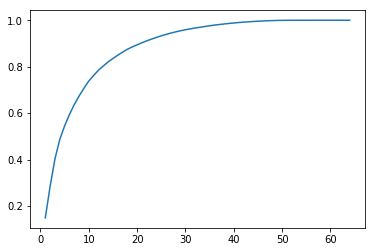

In [101]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),variance)

In [102]:
pca=decomposition.PCA(whiten=True,n_components=0.8)
pca.fit(x_data)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [103]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [104]:
x_train_pca=pca.transform(x_train)

In [105]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500)
mlp.fit(x_train_pca,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [106]:
x_test_pca=pca.transform(x_test)


In [107]:
x_test_pca.shape

(450, 13)

In [108]:
predictions=mlp.predict(x_test_pca)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97        44
          1       0.95      0.98      0.96        53
          2       1.00      0.93      0.97        46
          3       0.95      0.95      0.95        42
          4       0.98      0.96      0.97        51
          5       1.00      0.92      0.96        38
          6       0.98      1.00      0.99        47
          7       0.98      0.93      0.95        45
          8       0.84      0.88      0.86        43
          9       0.95      0.98      0.96        41

avg / total       0.96      0.96      0.96       450

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  1  0]
 [ 1  1 43  0  0  0  0  0  1  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 1  0  0  0 49  0  1  0  0  0]
 [ 1  0  0  0  0 35  0  0  1  1]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 42  3  0]
 [ 0  1  0  2  1  0  0  0 38  1]
 [ 0  1  0  0  0  0  0  0  0 40]]
